In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Explainable AI
import shap

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Replace 'fetal_health.csv' with your actual file path if different
data = pd.read_csv('/content/fetal_health.csv')

# Display the first five rows to verify
print("First five rows of the dataset:")
print(data.head())


First five rows of the dataset:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0 

In [3]:
# Check the shape of the dataset
print(f"Dataset Shape: {data.shape}")

# Check the data types of each column
print("\nData Types:")
print(data.dtypes)


Dataset Shape: (2126, 22)

Data Types:
baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks            

In [4]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.

In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())



Missing Values in Each Column:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogra

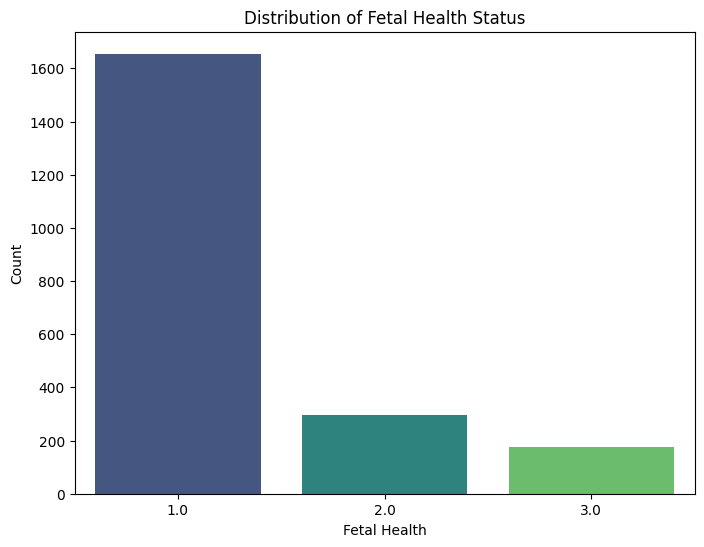

In [6]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', data=data, palette='viridis')
plt.title('Distribution of Fetal Health Status')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()


In [7]:
# Convert 'fetal_health' to integer
data['fetal_health'] = data['fetal_health'].astype(int)

# Verify the conversion
print("\nData Types After Conversion:")
print(data.dtypes)



Data Types After Conversion:
baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                     

In [8]:
# Mapping numerical classes to descriptive labels
health_mapping = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
data['fetal_health_label'] = data['fetal_health'].map(health_mapping)

# Display the updated DataFrame
print("\nDataset with Mapped Labels:")
print(data[['fetal_health', 'fetal_health_label']].head())



Dataset with Mapped Labels:
   fetal_health fetal_health_label
0             2            Suspect
1             1             Normal
2             1             Normal
3             1             Normal
4             1             Normal


In [9]:
# Features (all columns except 'fetal_health' and 'fetal_health_label')
X = data.drop(['fetal_health', 'fetal_health_label'], axis=1)

# Target variable
y = data['fetal_health']


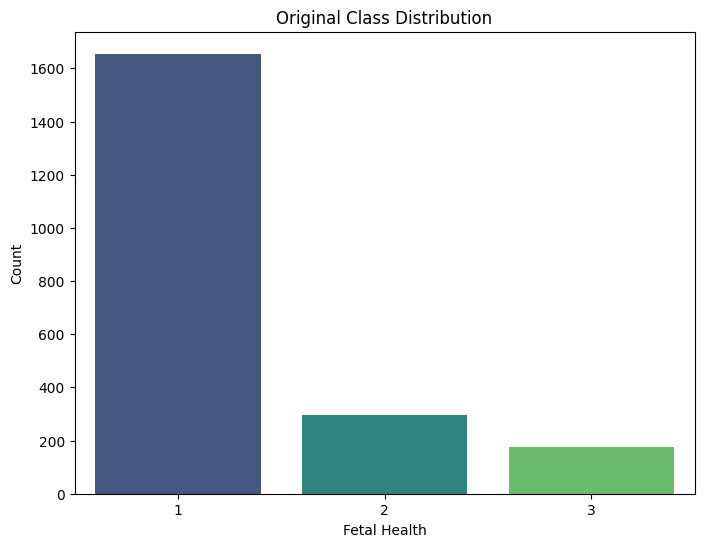

In [10]:
# Visualize the original class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Original Class Distribution')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()


In [11]:
# Split the data (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shapes of the splits
print(f"\nTraining Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")



Training Set Shape: (1700, 21)
Testing Set Shape: (426, 21)


In [12]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("\nClass Distribution After SMOTE:")
print(y_train_resampled.value_counts())



Class Distribution After SMOTE:
fetal_health
3    1323
1    1323
2    1323
Name: count, dtype: int64


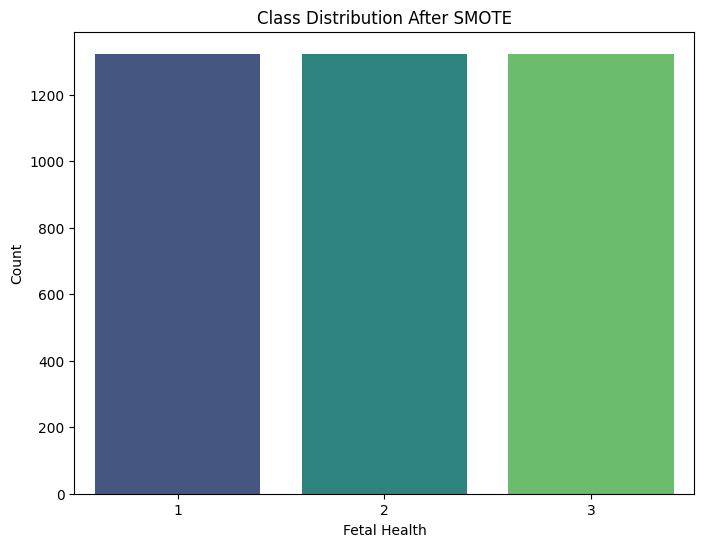

In [13]:
# Visualize the resampled class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()


In [14]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the resampled training data and transform
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train_resampled.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)


In [15]:
# Verify scaling by checking means and standard deviations
print("\nMean of Scaled Training Features (Should be ~0):")
print(X_train_scaled.mean())

print("\nStandard Deviation of Scaled Training Features (Should be ~1):")
print(X_train_scaled.std())



Mean of Scaled Training Features (Should be ~0):
baseline value                                            5.657130e-16
accelerations                                            -5.728740e-17
fetal_movement                                            1.432185e-17
uterine_contractions                                     -4.296555e-17
light_decelerations                                      -3.580462e-17
severe_decelerations                                      7.160925e-17
prolongued_decelerations                                 -1.718622e-16
abnormal_short_term_variability                           0.000000e+00
mean_value_of_short_term_variability                      5.012647e-17
percentage_of_time_with_abnormal_long_term_variability   -5.728740e-17
mean_value_of_long_term_variability                      -8.593109e-17
histogram_width                                           9.130179e-17
histogram_min                                             3.705778e-16
histogram_max              

In [16]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled and scaled training data
rf_classifier.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)



Confusion Matrix:
[[319  12   1]
 [ 11  44   4]
 [  1   2  32]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96       332
     Suspect       0.76      0.75      0.75        59
Pathological       0.86      0.91      0.89        35

    accuracy                           0.93       426
   macro avg       0.86      0.87      0.87       426
weighted avg       0.93      0.93      0.93       426



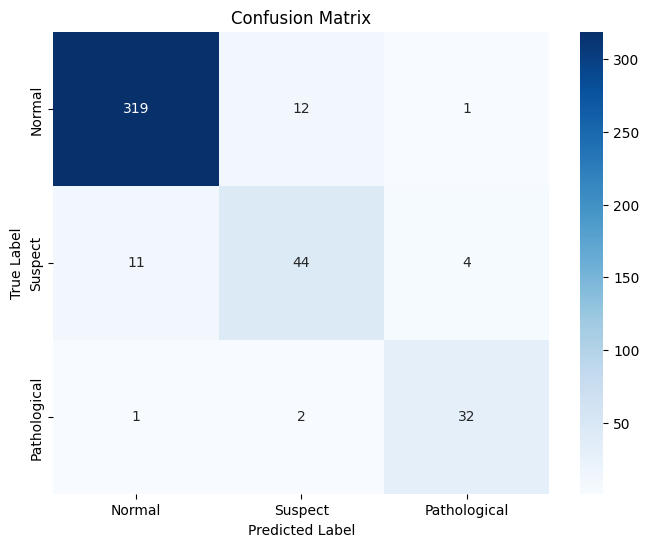

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Normal', 'Suspect', 'Pathological'])
print("\nClassification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Suspect', 'Pathological'],
            yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Top 10 Feature Importances:
                                              Feature  Importance
7                     abnormal_short_term_variability    0.127653
9   percentage_of_time_with_abnormal_long_term_var...    0.125503
17                                     histogram_mean    0.099296
6                            prolongued_decelerations    0.083704
8                mean_value_of_short_term_variability    0.073454
18                                   histogram_median    0.070387
1                                       accelerations    0.067313
16                                     histogram_mode    0.055938
10                mean_value_of_long_term_variability    0.053785
0                                      baseline value    0.042686


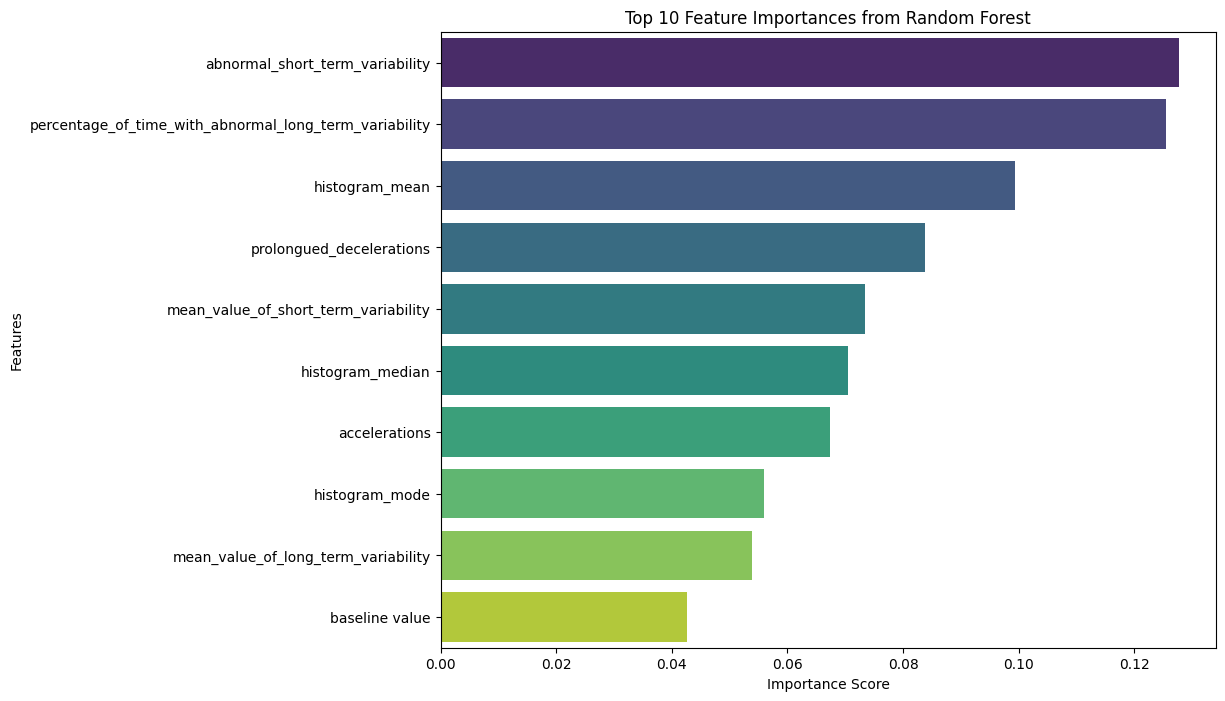

In [18]:
# Extract feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("\nTop 10 Feature Importances:")
print(feature_importances.head(10))

# Visualize Feature Importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [19]:
# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)


Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values: (426, 21, 3)
Model classes: [1 2 3]

Generating SHAP Summary Plot for class: Normal
Shape of shap_values_class for Normal: (426, 21)


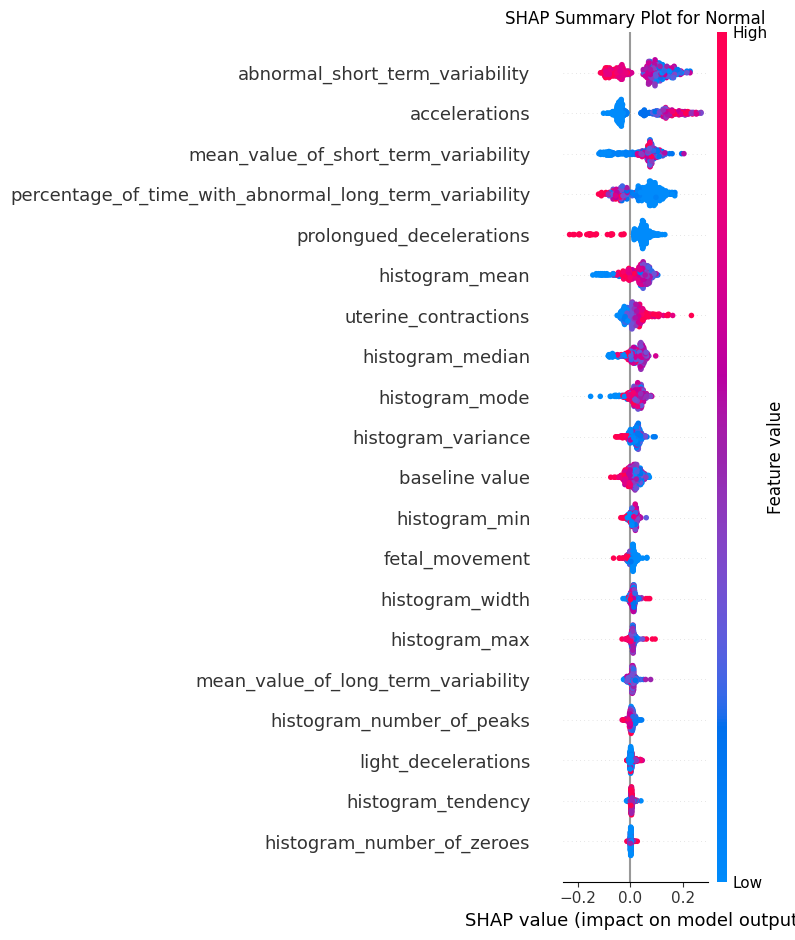


Generating SHAP Summary Plot for class: Suspect
Shape of shap_values_class for Suspect: (426, 21)


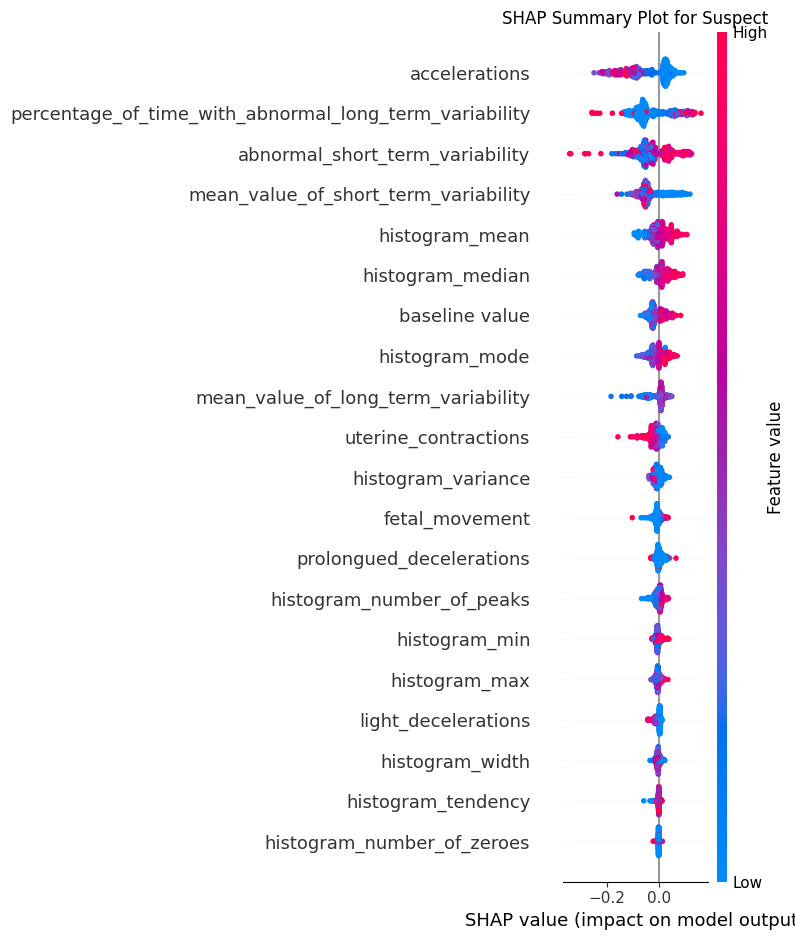


Generating SHAP Summary Plot for class: Pathological
Shape of shap_values_class for Pathological: (426, 21)


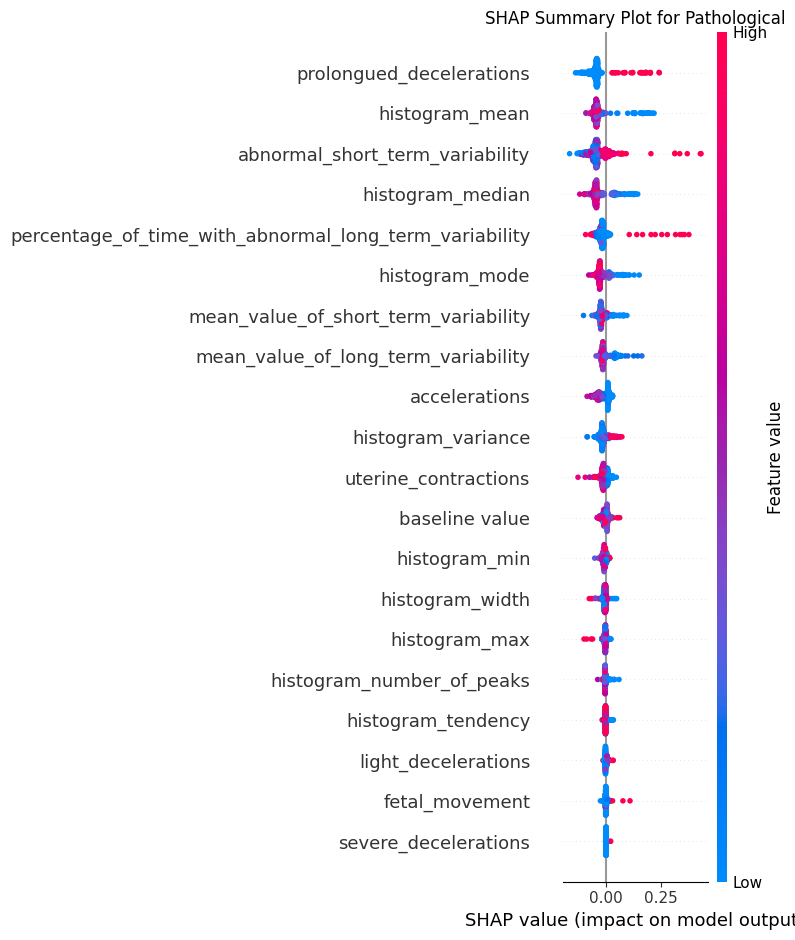

In [20]:
# Step 9.b: SHAP Summary Plot with Correct Indexing

import shap
import matplotlib.pyplot as plt

# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Verify the structure of shap_values
print(f"Type of shap_values: {type(shap_values)}")
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Model classes: {rf_classifier.classes_}")

# Define class names for plotting
class_names = ['Normal', 'Suspect', 'Pathological']

# Loop through each class to generate SHAP summary plots
for i, class_name in enumerate(class_names):
    print(f"\nGenerating SHAP Summary Plot for class: {class_name}")

    # Extract SHAP values for the current class
    shap_values_class = shap_values[:, :, i]

    # Verify the shape
    print(f"Shape of shap_values_class for {class_name}: {shap_values_class.shape}")

    # Generate the SHAP summary plot
    shap.summary_plot(
        shap_values_class,
        X_test_scaled,
        feature_names=X.columns,
        show=False
    )

    # Set the title for the plot
    plt.title(f'SHAP Summary Plot for {class_name}')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [21]:
# Check the type and structure of shap_values
print(f"Type of shap_values: {type(shap_values)}")

# If shap_values is a list, print the length and shape of each element
if isinstance(shap_values, list):
    print(f"Number of classes: {len(shap_values)}")
    for idx, sv in enumerate(shap_values):
        print(f"Shape of shap_values[{idx}] for class {rf_classifier.classes_[idx]}: {sv.shape}")
else:
    # For binary classification, shap_values may not be a list
    print(f"Shape of shap_values: {shap_values.shape}")

# Verify X_test_scaled shape
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")


Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values: (426, 21, 3)
Shape of X_test_scaled: (426, 21)



SHAP Summary Bar Plot for class: Pathological


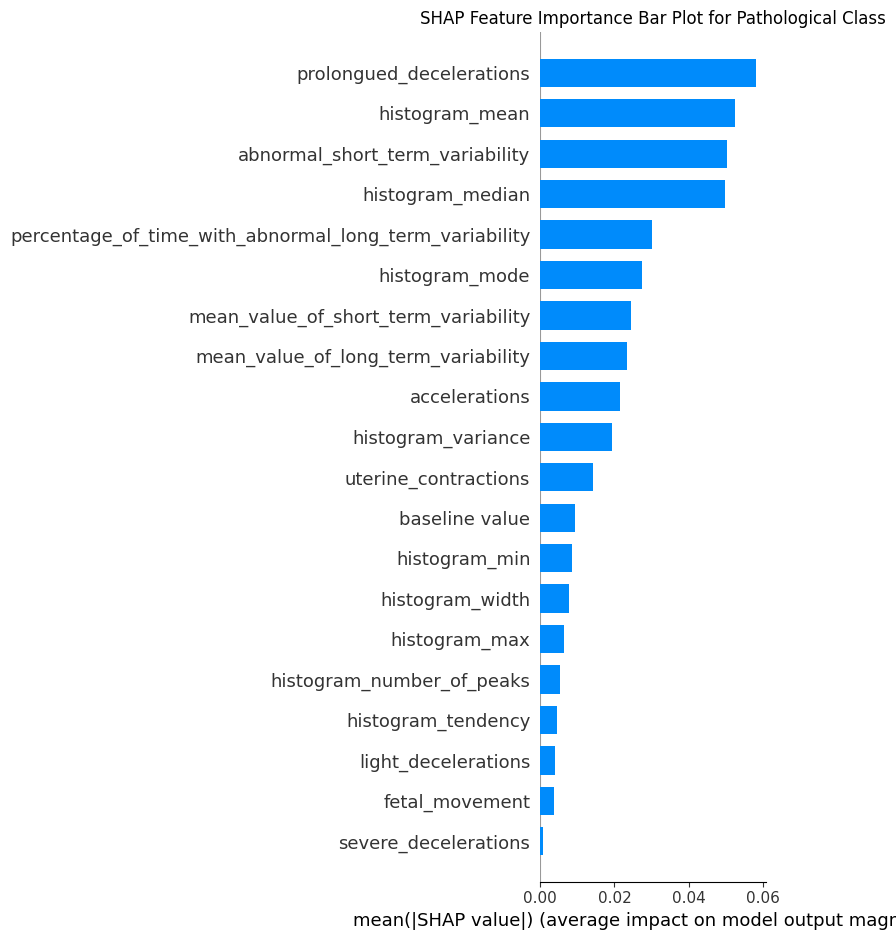

In [25]:
# SHAP summary bar plot for the 'Pathological' class
class_index = 2  # Assuming 'Pathological' is the third class

print(f"\nSHAP Summary Bar Plot for class: Pathological")
shap.summary_plot(
    shap_values[:, :, class_index],
    X_test_scaled,
    plot_type="bar",
    feature_names=X.columns,
    show=False
)
plt.title('SHAP Feature Importance Bar Plot for Pathological Class')
plt.tight_layout()
plt.show()



SHAP Dependence Plot for feature: abnormal_short_term_variability


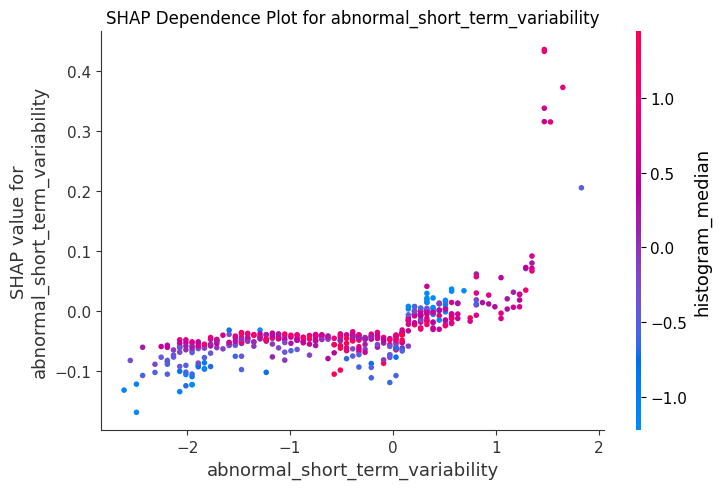

In [26]:
# Replace 'feature_name' with the actual feature you want to analyze
# For demonstration, we'll use the top feature from feature_importances
top_feature = feature_importances['Feature'].iloc[0]
print(f"\nSHAP Dependence Plot for feature: {top_feature}")
shap.dependence_plot(
    top_feature,
    shap_values[:, :, class_index],
    X_test_scaled,
    feature_names=X.columns,
    show=False
)
plt.title(f'SHAP Dependence Plot for {top_feature}')
plt.tight_layout()
plt.show()



SHAP Force Plot for instance index: 0 (Pathological Class)


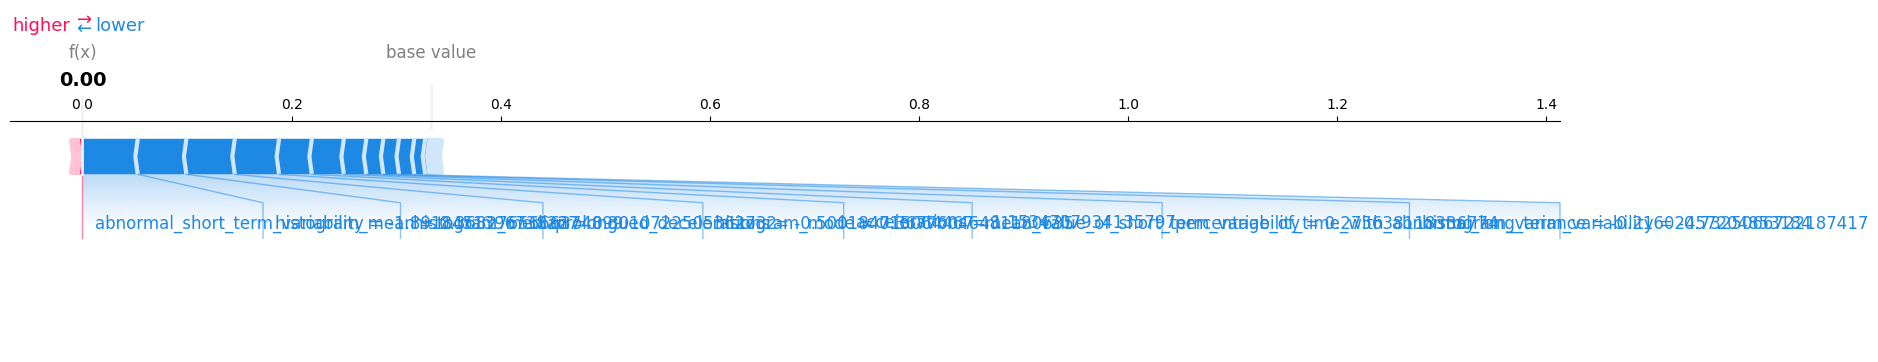

In [27]:
# Select an instance to explain (e.g., the first instance in the test set)
instance_index = 0
instance = X_test_scaled.iloc[instance_index]

# Generate SHAP values for the instance
instance_shap_values = shap_values[instance_index, :, class_index]

# Create a force plot for the 'Pathological' class
print(f"\nSHAP Force Plot for instance index: {instance_index} (Pathological Class)")
shap.initjs()
shap.force_plot(
    explainer.expected_value[class_index],
    instance_shap_values,
    instance,
    feature_names=X.columns,
    matplotlib=True
)
plt.show()



Top 10 Permutation Feature Importances:
                                              Feature  Importance       Std
7                     abnormal_short_term_variability    0.043975  0.009130
9   percentage_of_time_with_abnormal_long_term_var...    0.029499  0.007635
1                                       accelerations    0.017371  0.007463
17                                     histogram_mean    0.008764  0.004533
16                                     histogram_mode    0.007277  0.004214
19                                 histogram_variance    0.006416  0.003026
18                                   histogram_median    0.004460  0.005331
13                                      histogram_max    0.004225  0.003114
0                                      baseline value    0.003991  0.004501
6                            prolongued_decelerations    0.002660  0.002623


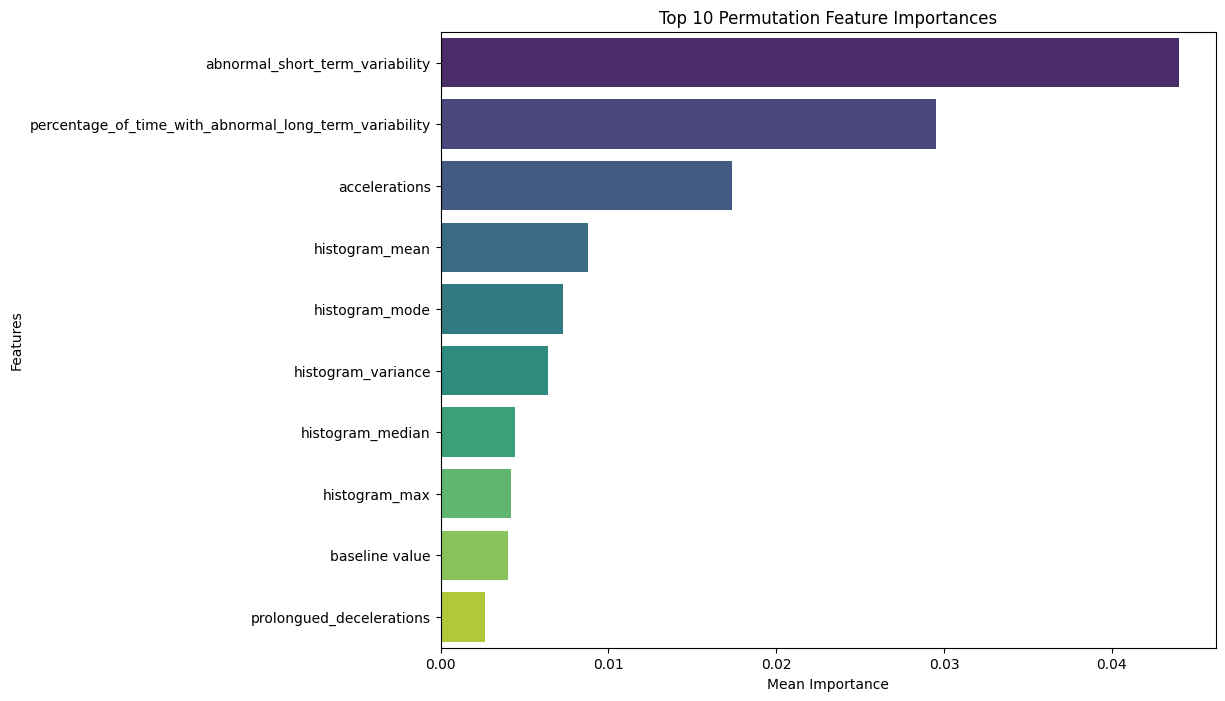

In [28]:
from sklearn.inspection import permutation_importance

# Compute permutation importance on the test set
perm_importance = permutation_importance(rf_classifier, X_test_scaled, y_test,
                                         n_repeats=30, random_state=42, n_jobs=-1)

# Create a DataFrame for visualization
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values(by='Importance', ascending=False)

# Display the top 10 permutation importances
print("\nTop 10 Permutation Feature Importances:")
print(perm_importance_df.head(10))

# Visualize Permutation Importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df.head(10), palette='viridis')
plt.title('Top 10 Permutation Feature Importances')
plt.xlabel('Mean Importance')
plt.ylabel('Features')
plt.show()


In [29]:
# Step 10.b: Define Class Names and Initialize Data Structures (Without 'Feature')

# Define class names corresponding to class indices
class_names = ['Normal', 'Suspect', 'Pathological']

# Initialize an empty dictionary to store SHAP statistics (Exclude 'Feature')
shap_stats = {
    'Normal_mean_SHAP': [],
    'Normal_mean_abs_SHAP': [],
    'Suspect_mean_SHAP': [],
    'Suspect_mean_abs_SHAP': [],
    'Pathological_mean_SHAP': [],
    'Pathological_mean_abs_SHAP': []
}

# Step 10.c: Calculate SHAP Statistics for Each Class

import numpy as np  # Ensure numpy is imported

# Iterate through each class to compute SHAP statistics
for i, class_name in enumerate(class_names):
    # Extract SHAP values for the current class
    shap_values_class = shap_values[:, :, i]  # Shape: (426, 21)

    # Compute mean SHAP value per feature for the class
    mean_shap = np.mean(shap_values_class, axis=0)  # Shape: (21,)

    # Compute mean absolute SHAP value per feature for the class
    mean_abs_shap = np.mean(np.abs(shap_values_class), axis=0)  # Shape: (21,)

    # Store the results in the dictionary
    shap_stats[f'{class_name}_mean_SHAP'] = mean_shap
    shap_stats[f'{class_name}_mean_abs_SHAP'] = mean_abs_shap


In [30]:
# Step 10.d: Create the SHAP Feature Importance DataFrame

import pandas as pd  # Ensure pandas is imported

# Create a DataFrame from the shap_stats dictionary
shap_importance_df = pd.DataFrame(shap_stats)

# Add the 'Feature' column from X.columns
shap_importance_df['Feature'] = X.columns

# Rearrange columns to place 'Feature' first
shap_importance_df = shap_importance_df[['Feature',
                                         'Normal_mean_SHAP',
                                         'Normal_mean_abs_SHAP',
                                         'Suspect_mean_SHAP',
                                         'Suspect_mean_abs_SHAP',
                                         'Pathological_mean_SHAP',
                                         'Pathological_mean_abs_SHAP']]


In [31]:
# Step 10.e: Incorporate Random Forest Feature Importances

# Extract Random Forest feature importances
rf_feature_importances = rf_classifier.feature_importances_

# Add Random Forest feature importances to the DataFrame
shap_importance_df['RandomForest_Feature_Importance'] = rf_feature_importances

# Optionally, sort the DataFrame based on 'Normal_mean_abs_SHAP' in descending order
shap_importance_df = shap_importance_df.sort_values(by='Normal_mean_abs_SHAP', ascending=False).reset_index(drop=True)


In [32]:
# Step 10.f: Display the SHAP Feature Importance Table

print("SHAP Feature Importance Table:")
print(shap_importance_df)


SHAP Feature Importance Table:
                                              Feature  Normal_mean_SHAP  \
0                     abnormal_short_term_variability          0.059508   
1                                       accelerations          0.050380   
2                mean_value_of_short_term_variability          0.049575   
3   percentage_of_time_with_abnormal_long_term_var...          0.043462   
4                            prolongued_decelerations          0.035663   
5                                      histogram_mean          0.028774   
6                                uterine_contractions          0.019755   
7                                    histogram_median          0.022378   
8                                      histogram_mode          0.020444   
9                                  histogram_variance          0.017502   
10                                     baseline value          0.011218   
11                                      histogram_min          0.0107

In [ ]:
# Save the table to a CSV file
shap_importance_df.to_csv('SHAP_Feature_Importances.csv', index=False)

print("Feature importance table saved as 'SHAP_Feature_Importances.csv'.")


Feature importance table saved as 'SHAP_Feature_Importances.csv'.
